<a href="https://colab.research.google.com/github/rachelcynthia/DeepLearning-Bootcamp/blob/master/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

Getting the dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Setting input and target variable

In [3]:
x=data.drop('target',axis=1)
y=data['target']

Splitting into training and test set

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Building the model

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import Dense

In [9]:
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(x_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # Sigmoid activation function --> To get values between 0 and 1

Model Compilation

In [10]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


Plotting the model

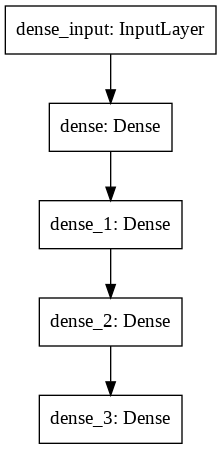

In [12]:
from keras.utils import plot_model
plot_model(model)

Model Training

In [13]:
history = model.fit(x_train,y_train,validation_split = 0.2, epochs=200, batch_size=10,verbose=1)

Epoch 1/200
20/20 [==============================] - 0s 11ms/step - loss: 19.5709 - accuracy: 0.4560 - val_loss: 6.3962 - val_accuracy: 0.4286
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 4.4543 - accuracy: 0.4560 - val_loss: 1.7747 - val_accuracy: 0.4286
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 1.1415 - accuracy: 0.4560 - val_loss: 0.7396 - val_accuracy: 0.4694
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.7584 - accuracy: 0.4508 - val_loss: 0.7575 - val_accuracy: 0.4694
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6994 - accuracy: 0.5544 - val_loss: 0.6632 - val_accuracy: 0.6327
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.5285 - val_loss: 0.7034 - val_accuracy: 0.5102
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5440 - val_loss: 0.6862 - val_accuracy: 0.5918
Epoch 8/200

In [14]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.6882 - accuracy: 0.5410


[0.6881725788116455, 0.5409836173057556]